# Rainfall Weather Forecasting

 Data Loading and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv?raw=true'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  

Data Cleaning and Missing Value Handling

In [3]:
# Data overview
print("Dataset Shape:", df.shape)

# Display dataset information
print("\nDataset Info:")
print(df.info())

# Display summary statistics
print("\nDataset Description:")
print(df.describe())

# Checking for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)

# Fill missing values with appropriate methods (mean, median, mode, or drop)
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)

# For categorical columns, fill missing values with mode
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop rows with any remaining missing values
df.dropna(inplace=True)

# Verify no missing values remain
print("\nNumber of missing values after cleaning:")
print(df.isnull().sum().sum())


Dataset Shape: (8079, 23)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8079 non-null   object 
 1   Location       8079 non-null   object 
 2   MinTemp        8079 non-null   float64
 3   MaxTemp        8079 non-null   float64
 4   Rainfall       8079 non-null   float64
 5   Evaporation    8079 non-null   float64
 6   Sunshine       8079 non-null   float64
 7   WindGustDir    8079 non-null   object 
 8   WindGustSpeed  8079 non-null   float64
 9   WindDir9am     8079 non-null   object 
 10  WindDir3pm     8079 non-null   object 
 11  WindSpeed9am   8079 non-null   float64
 12  WindSpeed3pm   8079 non-null   float64
 13  Humidity9am    8079 non-null   float64
 14  Humidity3pm    8079 non-null   float64
 15  Pressure9am    8079 non-null   float64
 16  Pressure3pm    8079 non-null   float64
 17  Cloud9am   

Exploratory Data Analysis (EDA)

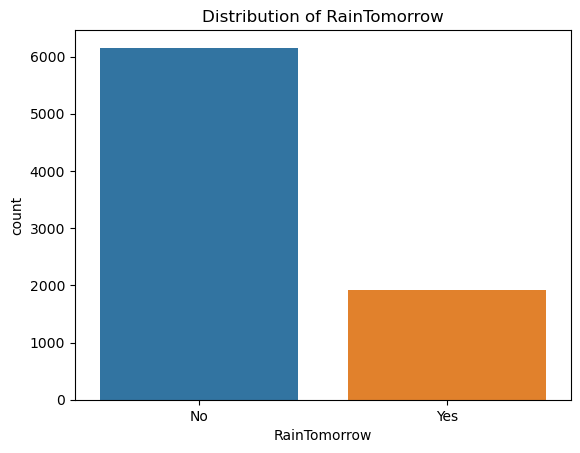

C:\Users\DELL\AppData\Local\Temp\ipykernel_7704\154044968.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


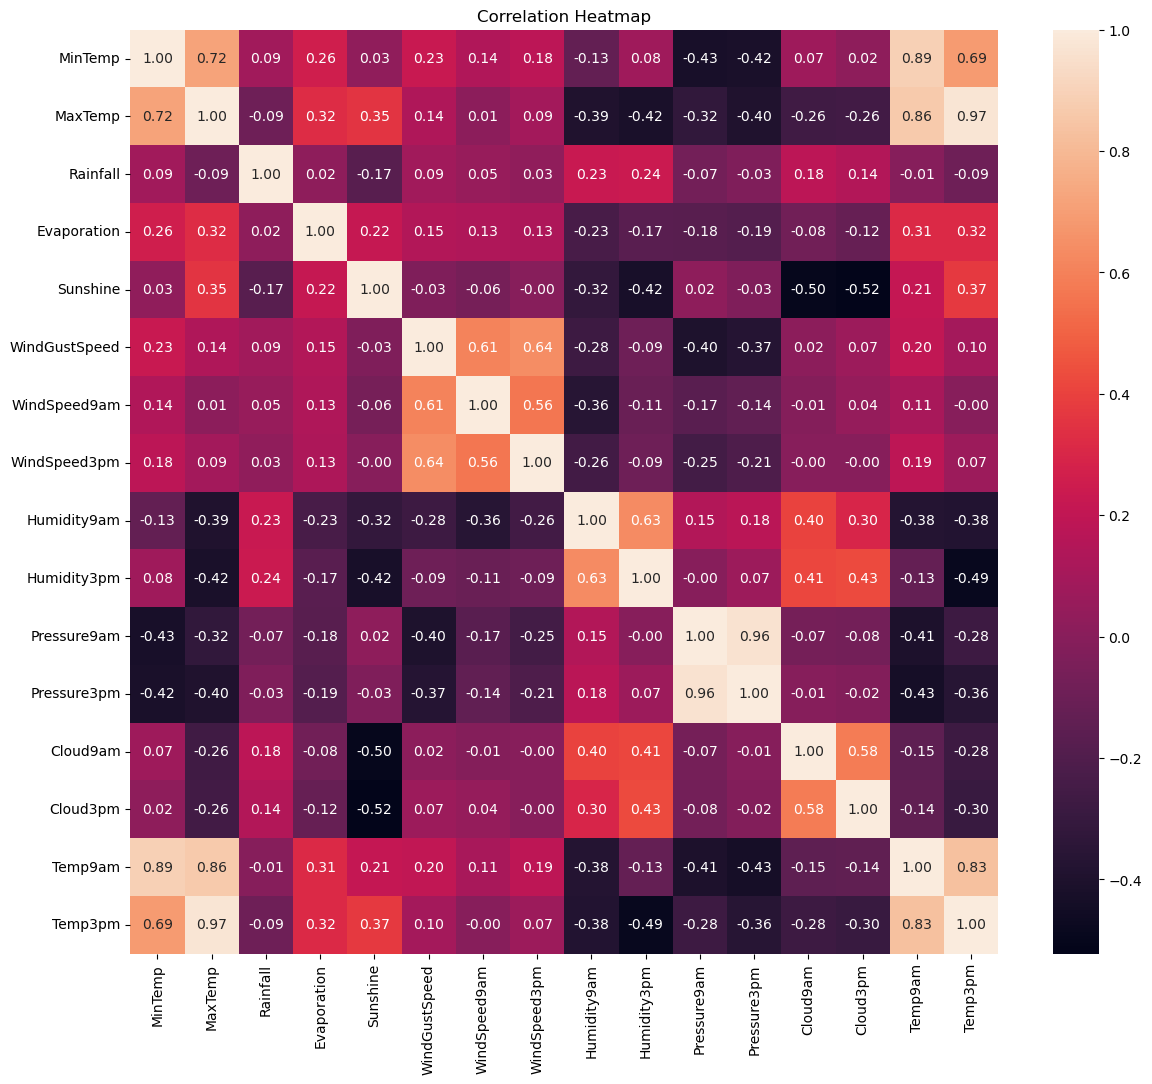

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of RainTomorrow
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Feature Engineering

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])

# Dropping the Date and Location columns as they are not useful for prediction
df.drop(['Date', 'Location'], axis=1, inplace=True)


Splitting the Data


In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data for classification problem
X_class = df.drop(['RainTomorrow'], axis=1)
y_class = df['RainTomorrow']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Splitting the data for regression problem
X_reg = df.drop(['Rainfall'], axis=1)
y_reg = df['Rainfall']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


Model Training and Evaluation for Classification

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Training the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Making predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluation
print('\nClassification Task:')
print('Accuracy:', accuracy_score(y_test_class, y_pred_class))
print('Confusion Matrix:\n', confusion_matrix(y_test_class, y_pred_class))
print('Classification Report:\n', classification_report(y_test_class, y_pred_class))



Classification Task:
Accuracy: 0.9164603960396039
Confusion Matrix:
 [[1233   30]
 [ 105  248]]
Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.98      0.95      1263
         Yes       0.89      0.70      0.79       353

    accuracy                           0.92      1616
   macro avg       0.91      0.84      0.87      1616
weighted avg       0.92      0.92      0.91      1616



 Model Training and Evaluation for Regression

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset (ensure you have the correct URL)
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv?raw=true'
df = pd.read_csv(url)

# Data Cleaning (handle missing values)
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)

# For categorical columns, fill missing values with mode
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop rows with any remaining missing values
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])

# Encode the target variable 'RainTomorrow' for classification
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

# Drop unnecessary columns
df.drop(['Date', 'Location'], axis=1, inplace=True)

# Splitting the data for regression problem
X_reg = df.drop(['Rainfall'], axis=1)
y_reg = df['Rainfall']

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Training the regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Making predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluation
print('\nRegression Task:')
print('Mean Squared Error:', mean_squared_error(y_test_reg, y_pred_reg))
print('R2 Score:', r2_score(y_test_reg, y_pred_reg))



Regression Task:
Mean Squared Error: 109.27601137871287
R2 Score: 0.30866760711122


: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for the classification model
param_grid_class = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_class = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_class, cv=3, n_jobs=-1, verbose=2)
grid_search_class.fit(X_train_class, y_train_class)

best_class_model = grid_search_class.best_estimator_
print('\nBest parameters for classification model:', grid_search_class.best_params_)

# Hyperparameter tuning for the regression model
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_reg = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_reg, cv=3, n_jobs=-1, verbose=2)
grid_search_reg.fit(X_train_reg, y_train_reg)

best_reg_model = grid_search_reg.best_estimator_
print('\nBest parameters for regression model:', grid_search_reg.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


Conclusion: